In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
df = pd.read_csv("housing.csv")

# Expolratory Data Analysis

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

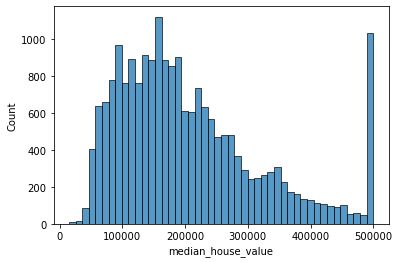

In [4]:
sns.histplot(df.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

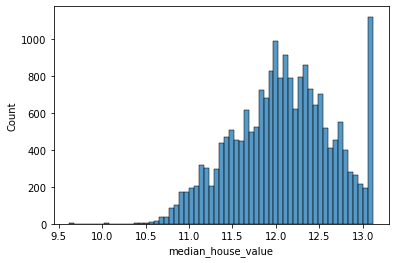

In [5]:
price_logs = np.log(df.median_house_value)
sns.histplot(np.log(df.median_house_value))

In [6]:
cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
df1 = df.loc[:, cols]

### Missing Values

In [7]:
# Q1
df1[df1.columns[df1.isnull().any()]].isnull().sum()

total_bedrooms    207
dtype: int64

In [8]:
# Q2
df1.population.median()

1166.0

### Splitting the data

In [9]:
np.random.seed(42)

n = len(df1)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

n, n_train, n_val , n_test

(20640, 12384, 4128, 4128)

In [10]:
idx = np.arange(n)
shuffle_idx = np.random.shuffle(idx)

df_train = df1.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df1.iloc[idx[n_train : n_train+n_val]].reset_index(drop=True)
df_test = df1.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [11]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [12]:
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [13]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Linear Regression Model

In [14]:
X_train_zero = df_train.fillna(0).values

mean = df_train['total_bedrooms'].mean()
X_train_mean = df_train.fillna(mean).values

In [15]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    lin_reg = XTX_inv.dot(X.T).dot(y)
    
    return lin_reg[0], lin_reg[1:]

In [61]:
X_val_fzero = df_val.fillna(0).values
X_val_fmean = df_val.fillna(mean).values

X_test_fzero = df_test.fillna(0).values
X_test_fmean = df_test.fillna(mean).values

In [62]:
def rmse(y, y_pred):
    err = (y - y_pred)
    sq_err = err ** 2
    m_sq_err = np.sum(sq_err) / len(y)
    r_m_sq_err = np.sqrt(m_sq_err)
    
    return r_m_sq_err

In [64]:
# predictions with missing values replaced by zero (0).
b, w = linear_regression(X_train_zero, y_train)
y_pred = b + X_val_fzero.dot(w)

In [28]:
# rmse with missing values filled as 0
rmse(y_val, y_pred)

0.32953303652286825

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

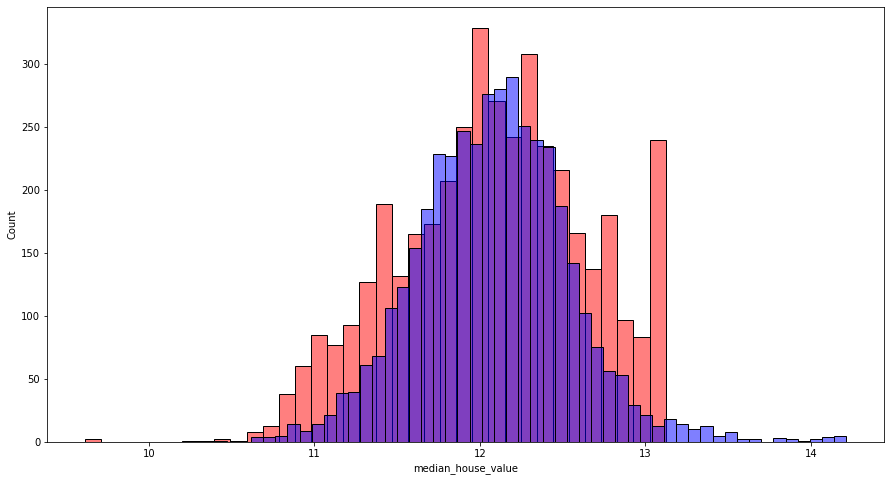

In [20]:
plt.figure(figsize=(15, 8))
sns.histplot(y_val, color='red', alpha=0.5)
sns.histplot(y_pred, color='blue', alpha=0.5)

In [65]:
# predictions with missing values replaced by mean
b, w = linear_regression(X_train_mean, y_train)
y_pred = b + X_val_fmean.dot(w)

In [66]:
# rmse
rmse(y_val, y_pred)

0.3290202549940456

# Regularized Linear Regression

In [67]:
def linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
                           
    XTX_inv = np.linalg.inv(XTX)
    lin_reg = XTX_inv.dot(X.T).dot(y)
    
    return lin_reg[0], lin_reg[1:]

In [69]:
b, w = linear_regression_reg(X_train_zero, y_train, 0.001)
y_pred = b + X_val_fzero.dot(w) 

In [70]:
r = [0, 0.000001, 0.001, 0.0001]

for v in r:
    b, w = linear_regression_reg(X_train_zero, y_train, v)
    y_pred = b + X_val_fzero.dot(w)
    
    err = rmse(y_val, y_pred)
    print(f"{v} -> {err}")

0 -> 0.32953303652286825
1e-06 -> 0.32953303616466123
0.001 -> 0.32953270386770533
0.0001 -> 0.3295330009702452


## Using different seed values

In [71]:
# Q5
n = len(df1)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

n, n_train, n_val , n_test

(20640, 12384, 4128, 4128)

In [73]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for v in seed_values:
    np.random.seed(v)
    
    idx = np.arange(n)
    shuffle_idx = np.random.shuffle(idx)

    df_train = df1.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df1.iloc[idx[n_train : n_train+n_val]].reset_index(drop=True)
    df_test = df1.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    
    X_train = df_train.fillna(0).values
    b, w = linear_regression(X_train, y_train)
    X_val = df_val.fillna(0).values
    y_pred = b + X_val.dot(w)
    
  
    error = rmse(y_val, y_pred)
    rmse_scores.append(error)

In [76]:
round(np.std(rmse_scores), 3)

0.002

In [77]:
# Q6
np.random.seed(9)
    
idx = np.arange(n)
shuffle_idx = np.random.shuffle(idx)

df_train = df1.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df1.iloc[idx[n_train : n_train+n_val]].reset_index(drop=True)
df_test = df1.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

X_train = df_train.fillna(0).values
b, w = linear_regression_reg(X_train, y_train, r = 0.001)
X_val = df_val.fillna(0).values
y_pred = b + X_val.dot(w)

rmse(y_val, y_pred)

0.16527504865290396

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

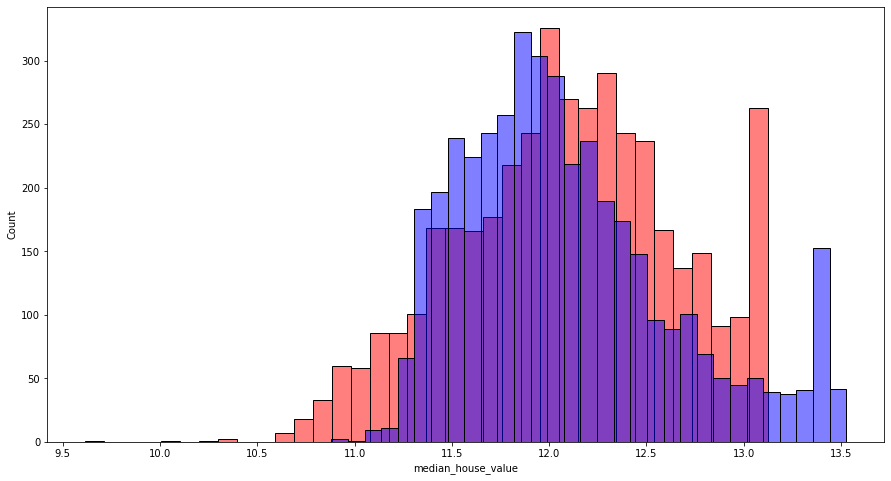

In [78]:
plt.figure(figsize=(15, 8))
sns.histplot(y_val, color='red', alpha=0.5)
sns.histplot(y_pred, color='blue', alpha=0.5)